<a href="https://colab.research.google.com/github/sahar-mariam/level2-report/blob/main/Anomaly_Detection_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the Breast Cancer dataset using scikit-learn and create a DataFrame.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Breast Cancer dataset from scikit-learn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
df = data.frame
X = df.drop(columns=['target'])

Create an Isolation Forest model and fit it to the dataset. The contamination parameter determines the proportion of anomalies expected in the data.

In [ ]:
# Create an Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)  # Adjust the contamination parameter

# Fit the model to the breast cancer dataset
clf.fit(X)

# Predict the anomalies
y_pred = clf.predict(X)

# Anomalies are labeled as -1, so we can check which data points are anomalies
anomalies = X[y_pred == -1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Use the trained model to predict anomalies and extract them from the data.

In [ ]:
# Print the anomalies
print("Anomalous data points:")
print(anomalies)

Anomalous data points:
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
3         11.420         20.38           77.58      386.1          0.14250   
9         12.460         24.04           83.97      475.9          0.11860   
12        19.170         24.80          132.40     1123.0          0.09740   
42        19.070         24.81          128.30     1104.0          0.09081   
68         9.029         17.33           58.79      250.5          0.10660   
71         8.888         14.64           58.79      244.0          0.09783   
78        20.180         23.97          143.70     1245.0          0.12860   
82        25.220         24.91          171.50     1878.0          0.10630   
108       22.270         19.67          152.80     1509.0          0.13260   
122       24.250         20.20          166.20     1761.0          0.14470   
152        9.731         15.34           

Visualize the data using a scatter plot, choosing two features ('mean radius' and 'mean texture') to represent the data points. Anomalies are color-coded differently from normal data points.

This code will print the anomalous data points and display a scatter plot to visualize the detected anomalies. You can adjust the contamination parameter and select different feature combinations for visualization as needed.

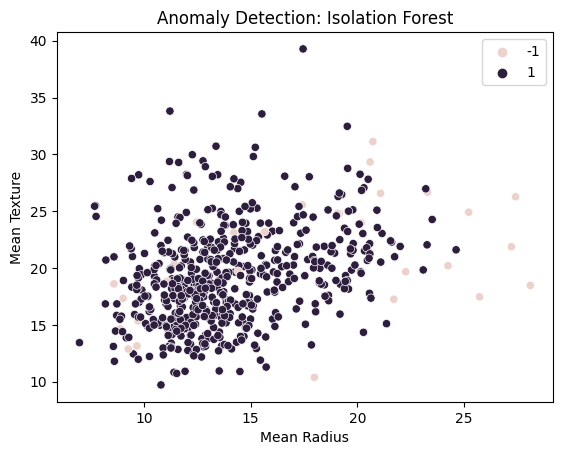

In [ ]:
# Visualize the data using a scatter plot (choose any two features)
sns.scatterplot(x=X['mean radius'], y=X['mean texture'], hue=y_pred)
plt.title('Anomaly Detection: Isolation Forest')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.show()
